In [75]:
import pandas as pd
import numpy as np
import talib as ta
import pytz
import datetime
from datetime import datetime

import MetaTrader5 as mt5
import time
# display data on the MetaTrader 5 package
print("MetaTrader5 package author: ",mt5.__author__)
print("MetaTrader5 package version: ",mt5.__version__)
print("")

MetaTrader5 package author:  MetaQuotes Software Corp.
MetaTrader5 package version:  5.0.34



# Login em contas:

In [76]:
# establish connection to the MetaTrader 5 terminal
if not mt5.initialize():
    print("initialize() failed, error code =",mt5.last_error())
    quit()
 
 #display data on MetaTrader 5 version
print(mt5.version())
# connect to the trade account without specifying a password and a server
account=17221085
authorized=mt5.login(account)  # the terminal database password is applied if connection data is set to be remembered
if authorized:
    print("connected to account #{}".format(account))
else:
    print("failed to connect at account #{}, error code: {}".format(account, mt5.last_error()))
 


  # now connect to another trading account specifying the password
account=25115284
authorized=mt5.login(account, password="gqrtz0lbdm")
if authorized:
    # display trading account data 'as is'
    print(mt5.account_info())
    # display trading account data in the form of a list
    print("Show account_info()._asdict():")
    account_info_dict = mt5.account_info()._asdict()
    for prop in account_info_dict:
        print("  {}={}".format(prop, account_info_dict[prop]))
else:
    print("failed to connect at account #{}, error code: {}".format(account, mt5.last_error()))
 
 # shut down connection to the MetaTrader 5 terminal
mt5.shutdown()

(500, 2815, '26 Feb 2021')
failed to connect at account #17221085, error code: (-7, 'Unsupported authorization mode, OTP or certificate password needed')
failed to connect at account #25115284, error code: (-2, 'Terminal: Invalid params')


True

# Função copy_rates_from

In [77]:
# establish connection to MetaTrader 5 terminal
if not mt5.initialize():
    print("initialize() failed, error code =",mt5.last_error())
    quit()
 
# set time zone to UTC
timezone = pytz.timezone("America/Sao_Paulo")
# create 'datetime' object in UTC time zone to avoid the implementation of a local time zone offset
utc_from = datetime(2020, 1, 10, tzinfo=timezone)
# get 10 EURUSD H4 bars starting from 01.10.2020 in UTC time zone
#Timeframe Examples: M1,M5,H1,H2,D1
rates = mt5.copy_rates_from("IBOV", mt5.TIMEFRAME_D1, utc_from, 1000)
 
# shut down connection to the MetaTrader 5 terminal
mt5.shutdown()
 
# create DataFrame out of the obtained data
rates_frame = pd.DataFrame(rates)
# convert time in seconds into the datetime format
rates_frame['time']=pd.to_datetime(rates_frame['time'], unit='s')

In [78]:
rates_frame

,time,open,high,low,close,tick_volume,spread,real_volume
0,2015-12-22,43208.0,43632.0,43137.0,43470.0,515884,0,3769339688
1,2015-12-23,43479.0,44233.0,43479.0,44017.0,5829448,0,34228080794
2,2015-12-28,44016.0,44087.0,43709.0,43764.0,393750,0,2562058141
3,2015-12-29,43781.0,44042.0,43523.0,43654.0,384465,0,2284830856
4,2015-12-30,43653.0,43662.0,43217.0,43350.0,544666,0,3999237169
...,...,...,...,...,...,...,...,...
995,2020-01-06,117707.0,117707.0,116269.0,116878.0,1533240,0,21057052213
996,2020-01-07,116872.0,117076.0,115965.0,116662.0,1207095,0,14811049509
997,2020-01-08,116667.0,117335.0,115693.0,116247.0,1369662,0,17808682314
998,2020-01-09,116248.0,116820.0,115411.0,115947.0,1428732,0,17974322291


# Função copy_rates_from_pos

In [79]:
# establish connection to MetaTrader 5 terminal
if not mt5.initialize():
    print("initialize() failed, error code =",mt5.last_error())
    quit()
 
 # get 10 GBPUSD D1 bars from the current day
rates = mt5.copy_rates_from_pos("IBOV", mt5.TIMEFRAME_D1, 2, 10)
 
# shut down connection to the MetaTrader 5 terminal
mt5.shutdown()
 
 # create DataFrame out of the obtained data
rates_frame = pd.DataFrame(rates)
# convert time in seconds into the datetime format
rates_frame['time']=pd.to_datetime(rates_frame['time'], unit='s')

In [80]:
rates_frame

,time,open,high,low,close,tick_volume,spread,real_volume
0,2021-02-10,119482.0,119738.0,117970.0,118435.0,1964467,0,23926519763
1,2021-02-11,118440.0,120283.0,118440.0,119300.0,6422840,0,83178441526
2,2021-02-12,119300.0,119763.0,118163.0,119429.0,1442402,0,17987573954
3,2021-02-17,119421.0,120597.0,118880.0,120356.0,1570490,0,21918971164
4,2021-02-18,120361.0,120846.0,118515.0,119199.0,2299815,0,29158364138
5,2021-02-19,119201.0,119250.0,117867.0,118431.0,2074576,0,27401019336
6,2021-02-22,118386.0,118386.0,111650.0,112668.0,4678543,0,54328114749
7,2021-02-23,112683.0,115380.0,112667.0,115228.0,3113533,0,39507487046
8,2021-02-24,115250.0,116208.0,114668.0,115668.0,2310833,0,29205286181
9,2021-02-25,115668.0,116506.0,111764.0,112256.0,2549031,0,31619847848


# Função copy_rates_range

In [81]:
# establish connection to MetaTrader 5 terminal
if not mt5.initialize():
    print("initialize() failed, error code =",mt5.last_error())
    quit()
 
 # set time zone to UTC
timezone = pytz.timezone("America/Sao_Paulo")
# create 'datetime' objects in UTC time zone to avoid the implementation of a local time zone offset
utc_from = datetime(2020, 1, 10, tzinfo=timezone)
utc_to = datetime(2020, 1, 11, hour = 13, tzinfo=timezone)
# get bars from USDJPY M5 within the interval of 2020.01.10 00:00 - 2020.01.11 13:00 in UTC time zone
rates = mt5.copy_rates_range("IBOV", mt5.TIMEFRAME_M5, utc_from, utc_to)
 
# shut down connection to the MetaTrader 5 terminal
mt5.shutdown()
 
 
# create DataFrame out of the obtained data
rates_frame = pd.DataFrame(rates)
# convert time in seconds into the 'datetime' format
rates_frame['time']=pd.to_datetime(rates_frame['time'], unit='s')

In [82]:
rates_frame

,time,open,high,low,close,tick_volume,spread,real_volume
0,2020-01-10 10:00:00,115948.0,116308.0,115948.0,116230.0,5096,0,74244471
1,2020-01-10 10:05:00,116202.0,116266.0,116112.0,116112.0,7918,0,122773370
2,2020-01-10 10:10:00,116051.0,116159.0,116025.0,116159.0,6660,0,128125632
3,2020-01-10 10:15:00,116180.0,116233.0,116032.0,116183.0,7258,0,125516525
4,2020-01-10 10:20:00,116189.0,116390.0,116189.0,116303.0,6967,0,107651078
...,...,...,...,...,...,...,...,...
91,2020-01-10 17:35:00,115087.0,115143.0,115081.0,115086.0,24025,0,255371000
92,2020-01-10 17:40:00,115021.0,115072.0,114952.0,115047.0,34159,0,298933880
93,2020-01-10 17:45:00,115068.0,115225.0,115068.0,115182.0,36680,0,326985470
94,2020-01-10 17:50:00,115076.0,115258.0,115076.0,115258.0,22556,0,298665110


# Função Order_Send Compra

In [83]:
# establish connection to the MetaTrader 5 terminal
if not mt5.initialize():
    print("initialize() failed, error code =",mt5.last_error())
    quit()
 
 
    # prepare the buy request structure
Ativo = "VALE3"

mt5.symbol_select(symbol,True)
price = mt5.symbol_info_tick(symbol).ask

SL=10
SP=10
lot = 200

point = mt5.symbol_info(symbol).point

deviation = 2
request= {
        
                'action': mt5.TRADE_ACTION_DEAL,
                'symbol': Ativo,
                'volume': float(lot),
                'type': mt5.ORDER_TYPE_BUY,
                'price': price,
                'sl': price - price*(SL/100),
                'tp': price + price*(SP/100),
                'deviation':deviation,
                'magic': 123456,
                'comment': 'Curso MT5',
                'type_time': mt5.ORDER_TIME_GTC,
                'type_filling': mt5.ORDER_FILLING_RETURN
}
# send a trading request
result = mt5.order_send(request)

In [84]:
result

# Função Order_Send Venda

In [111]:
# establish connection to the MetaTrader 5 terminal
if not mt5.initialize():
    print("initialize() failed, error code =",mt5.last_error())
    quit()
 
 
    # prepare the buy request structure
Ativo = "VALE3"

mt5.symbol_select(symbol,True)
price = mt5.symbol_info_tick(symbol).bid

SL=10
SP=10
lot = 200

point = mt5.symbol_info(symbol).point

deviation = 2
request= {
        
                'action': mt5.TRADE_ACTION_DEAL,
                'symbol': Ativo,
                'volume': float(lot),
                'type': mt5.ORDER_TYPE_SELL,
                'price': price,
                'tp': price - price*(SP/100),
                'sl': price + price*(SL/100),
                'deviation':deviation,
                'magic': 123456,
                'comment': 'Curso MT5',
                'type_time': mt5.ORDER_TIME_GTC,
                'type_filling': mt5.ORDER_FILLING_RETURN
}
# send a trading request
result = mt5.order_send(request)

In [112]:
result

OrderSendResult(retcode=10009, deal=514471886, order=660204775, volume=200.0, price=98.57, bid=98.56, ask=98.57, comment='Request executed', request_id=7, retcode_external=0, request=TradeRequest(action=1, magic=123456, order=0, symbol='VALE3', volume=200.0, price=98.56, stoplimit=0.0, sl=108.416, tp=88.70400000000001, deviation=2, type=1, type_filling=2, type_time=0, expiration=0, comment='Curso MT5', position=0, position_by=0))

# Gerando Indicadores com  a biblioteca TALIB

Documentação da biblioteca: https://mrjbq7.github.io/ta-lib/doc_index.html

In [87]:
# establish connection to MetaTrader 5 terminal
if not mt5.initialize():
    print("initialize() failed, error code =",mt5.last_error())
    quit()
 
 # set time zone to UTC
timezone = pytz.timezone("America/Sao_Paulo")
# create 'datetime' objects in UTC time zone to avoid the implementation of a local time zone offset
utc_from = datetime(2010, 1, 10, tzinfo=timezone)
utc_to = datetime(2020, 1, 11, hour = 13, tzinfo=timezone)
# get bars from USDJPY M5 within the interval of 2020.01.10 00:00 - 2020.01.11 13:00 in UTC time zone
rates = mt5.copy_rates_range("BOVA11", mt5.TIMEFRAME_D1, utc_from, utc_to)
 
# shut down connection to the MetaTrader 5 terminal
mt5.shutdown()
 
 
# create DataFrame out of the obtained data
rates_frame = pd.DataFrame(rates)
# convert time in seconds into the 'datetime' format
rates_frame['time']=pd.to_datetime(rates_frame['time'], unit='s')

In [88]:
rates_frame.index=rates_frame['time']

<AxesSubplot:xlabel='time'>

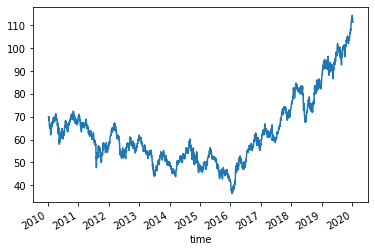

In [89]:
rates_frame['close'].plot()

In [90]:
rates_frame['upperband'], rates_frame['middleband'], rates_frame['lowerband'] = ta.BBANDS(rates_frame['close']
                                                                                          , timeperiod=5, nbdevup=2, nbdevdn=2, matype=0)

In [91]:
rates_frame

,time,open,high,low,close,tick_volume,spread,real_volume,upperband,middleband,lowerband
time,,,,,,,,,,,
2010-01-11,2010-01-11,70.25,70.47,69.63,70.00,90,1,180200,NaN,NaN,NaN
2010-01-12,2010-01-12,69.65,69.72,68.71,69.71,220,1,233800,NaN,NaN,NaN
2010-01-13,2010-01-13,69.67,70.01,68.98,70.01,67,1,89200,NaN,NaN,NaN
2010-01-14,2010-01-14,70.01,70.01,69.14,69.51,130,1,176000,NaN,NaN,NaN
2010-01-15,2010-01-15,68.81,69.20,68.18,68.51,187,1,286200,70.651768,69.548,68.444232
...,...,...,...,...,...,...,...,...,...,...,...
2020-01-06,2020-01-06,113.00,113.45,112.02,112.59,49161,1,6771940,114.993111,112.806,110.618889
2020-01-07,2020-01-07,112.90,112.90,111.59,112.24,82363,1,6096900,114.991488,112.820,110.648512
2020-01-08,2020-01-08,112.65,113.10,111.40,111.95,46982,1,6469320,114.757169,112.964,111.170831


<AxesSubplot:xlabel='time'>

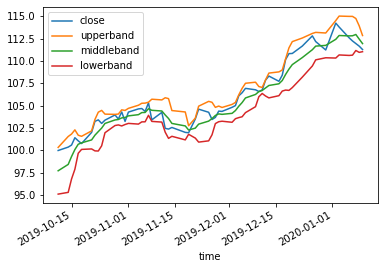

In [92]:
rates_frame[['close','upperband','middleband','lowerband']].tail(60).plot()

In [93]:
rates_frame['RSI']= ta.RSI(rates_frame['close'], timeperiod=14)

<AxesSubplot:xlabel='time'>

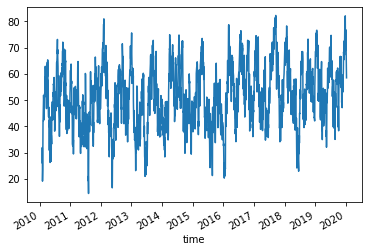

In [94]:
rates_frame['RSI'].plot()

In [95]:
rates_frame[['close','RSI']].tail()

,close,RSI
time,,
2020-01-06,112.59,66.308855
2020-01-07,112.24,64.265530
2020-01-08,111.95,62.545729
2020-01-09,111.66,60.793692
2020-01-10,111.28,58.481958
